# Worksheet 1: Introduction to Statistical Inference and Sampling

### Welcome to STAT 201: Statistical Inference for Data Science

Each week you will complete a lecture assignment like this one. Before we get started, there are some administrative details.

You can't learn technical subjects without hands-on practice. The weekly lecture worksheets and tutorials are an important part of the course. Collaborating on lecture worksheets and tutorial assignments is more than okay -- it's encouraged! You should rarely be stuck for more than a few minutes on questions in lecture or tutorial, so ask a neighbor, TA or an instructor for help (explaining things is beneficial, too -- the best way to solidify your knowledge of a subject is to explain it). Please don't just share answers, though. Everyone must submit a copy of their own work.

You can read more about course policies on the course website.

#### Lecture and Tutorial Learning Goals:
After completing this week's lecture and tutorial work, you will be able to:

1. Describe real-world examples of questions that can be answered with the statistical inference methods presented in this course (e.g., estimation, hypothesis testing).
1. Name common population parameters (mean, proportion, median, variance, standard deviation, and correlation) that are often estimated using sample data, and write computer scripts to calculate estimates of these parameters.
1. Define the following terms in relation to statistical inference: population, sample, population parameter, estimate, sampling distribution.
1. Write a computer script to draw random samples from a finite population (e.g., census data).
1. Write a computer script to reveal a sampling distribution from a finite population.

DSCI 100 is a prerequisite for this course so students should be comfortable with the tutorial and worksheet style and structure. Student should also be familar with answering  questions in a jupyter notebook and assessing if their answers are correct before submission. 


This worksheet covers [Chapter 7 - 7.3 of the Modern Dive Textbook](https://moderndive.com/7-sampling.html) of the online textbook. You should read this chapter before attempting this worksheet.

In [1]:
# Run this cell before continuing.
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(gridExtra)
library(taxyvr)
library(cowplot)
source("tests_worksheet_01.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘infer’ was built under R version 4.0.2”

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

 

## 1. Warm Up Questions

In DSCI 100, we learned about [6 different types of data analysis questions we can ask and answer](https://ubc-dsci.github.io/introduction-to-datascience/). Let's start this worksheet off by reminding us what an inferential question is.

**Question 1.0**
<br>{points: 1}

Which of the following is an example of an inferential question:

A. How many candy stores are there in Kitsilano?   
    
B. Does the average sleep duration of individuals who consume melatonin 30 minutes before bed differ from those who do not?     
     
C. If I study 28 hours, what score will I obtain on this exam?     
     
D. Does owning a houseplant lead to the adoption of a puppy?     
 
_Assign your answer to an object called `answer1.0`. Your answer should be a single character surrounded by quotes._

In [2]:
answer1.0 <- "B"

# your code here
#fail() # No Answer - remove if you provide an answer

In [3]:
test_1.0()

[1] "Success!"


**Question 1.1**
<br>{points: 1}

True or false?

"How does taking the new experimental drug result in lower blood pressure?" is an example of an inferential question.

_Assign your answer to an object called `answer1.1`. Your answer should be either "true" or "false", surrounded by quotes._

In [4]:
answer1.1 <- "false"

# your code here
#fail() # No Answer - remove if you provide an answer

In [5]:
test_1.1()

[1] "Success!"


**Question 1.2**
<br>{points: 1}

Which one of these R package can be used for virtual sampling?

A. `dbplyr`

B. `rep_sample_n`

C. `broom`

D. `infer`
        
_Assign your answer to an object called `answer1.2`. Your answer should be a single character surrounded by quotes._

In [6]:
answer1.2 <- "D"

# your code here
#fail() # No Answer - remove if you provide an answer

In [7]:
test_1.2()

[1] "Success!"


**Question 1.3**
<br> {points: 1}

Read the mixed-up table below and assign each object in the code cell below the integer associated with its correct definition.

> **Note:** some of these terms may have different meanings in other fields, but these are the definitions that we will be using in this course.

| <p align="left"> Term | <p align="left"> Definition |
|----------------|------------|
| <p align="left">mean | <p align="left">1. The number of entities/object with a specific characteristic divided by the total number of entities/objects. |
| <p align="left">proportion | <p align="left"> 2. The mean of the sum of the squared distances of each observation from the mean value of all observations.|
| <p align="left">median | <p align="left">3. The middle observation of a sorted variable’s data.|
| <p align="left">variance | <p align="left">4. The strength \& direction an upward or downward relationship between two variables.|
| <p align="left">standard deviation | <p align="left">5. The sum of all of the data observations divided by how many observations there are.|
| <p align="left">correlation | <p align="left">6. The square root of the variance.|
    
_Assign your answers to the objects given below (`mean`, `proportion`, `median`, `variance`, `standard_deviation`, and `correlation`). Your answers should each be a single integer._

In [8]:
mean <- 5
proportion <- 1
median <- 3
variance <- 2
standard_deviation <- 6
correlation <- 4

# your code here
#fail() # No Answer - remove if you provide an answer

In [9]:
test_1.3()

[1] "Success!"


**Question 1.4**
<br> {points: 1}

Read the mixed-up table below and assign each object in the code cell below the integer associated with its correct definition. 

>**Note:** some of these terms may have different meanings in other fields, but these are the definitions that we will be using in this course.

| Terms |  Definitions |
|----------------|------------|
| <p align="left">point estimate | <p align="left">1. the entire set of entities/objects of interest |
| <p align="left">population | <p align="left">2. a numerical summary value about the population|
| <p align="left">population parameter | <p align="left">3. a subset of entities/objects in the population |
| <p align="left">sample |  <p align="left">4. a single number calculated from a sample that estimates an unknown population parameter of interest |
| <p align="left">observation | <p align="left"> 5. a distribution of point estimates, where each point estimate was calculated from a different random sample from the same population |
| <p align="left">sampling distribution | <p align="left">6. a quantity or quality (or a set of these) from a single member of a population |
    
_Assign your answers to the objects given below (`point_estimate`, `population`, `population_parameter`, `sample`, `observation`, and `sampling_distribution`). Your answers should each be a single integer._

In [10]:
point_estimate <- 4
population <- 1
population_parameter <- 2
sample <- 3
observation <- 6
sampling_distribution <- 5

# your code here
#fail() # No Answer - remove if you provide an answer

In [11]:
test_1.4()

[1] "Success!"


**Question 1.5**
<br> {points: 1}

True or false?

A distribution shows all possible values (or intervals) of a variable, and how often they occur.

_Assign your answer to an object called `answer1.5`. Your answer should be either "true" or "false" surrounded by quotes._

In [12]:
answer1.5 <- 'true'

# your code here


In [13]:
test_1.5()

[1] "Success!"


**Question 1.6**
<br> {points: 1}

Tiffany got 10 packages of Skittles for Halloween. Every time she opened a new package, she recorded the number of red Skittles that it contained. The table below describes the distribution of the number of red Skittles after she opened all 10 packages.

| # Red Skittles | Frequency |
|----------------|-----------|
| 0              | 0         |
| 1              | 1         |
| 2              | 3         |
| 3              | 3         |
| 4              | 2         |
| 5              | 1         |
| > 5            | 0         |

Which histogram below could be used to describe the distribution of the number of red Skittles?

_Assign your answer to an object called `answer1.6`. Your answer should be a single character surrounded by quotes._

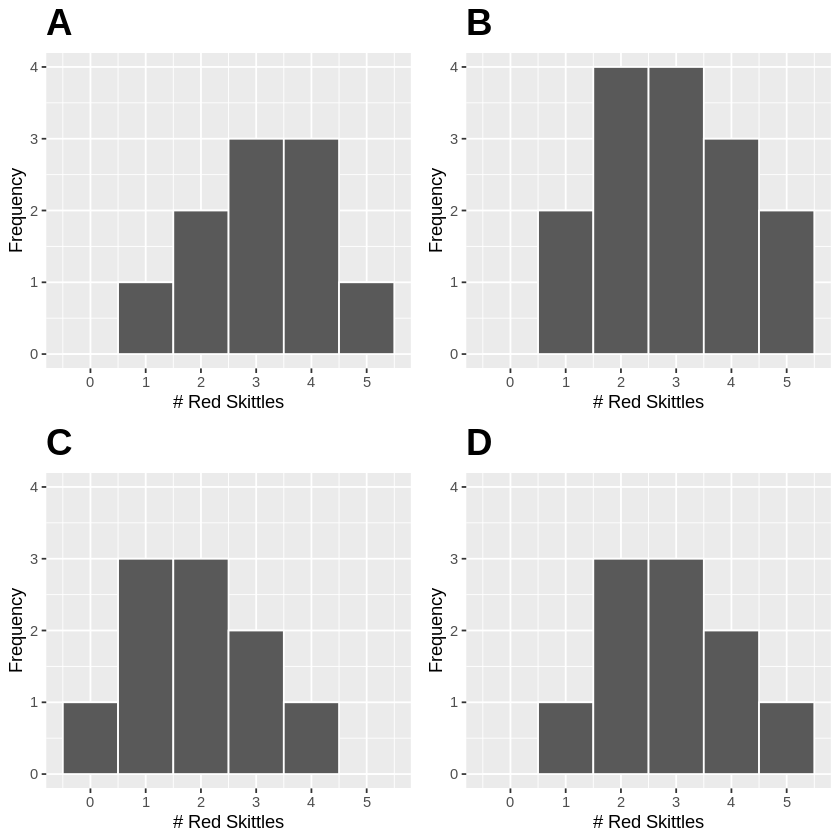

In [14]:
# Run this cell before continuing.
source("skittles.R")

In [15]:
answer1.6 <- "D"

# your code here


In [16]:
test_1.6()

[1] "Success!"


Use the histogram below to answer the next **two** questions. It was produced using the `mpg` variable from the `mtcars` dataset. Note that it is not necessary to understand the code used to produce the histogram to answer the questions.

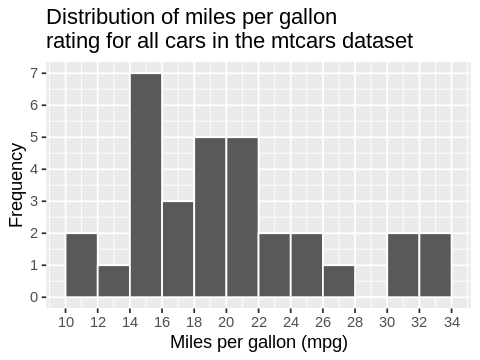

In [17]:
# Run this cell before continuing.
options(repr.plot.width = 4, repr.plot.height = 3)

mtcars %>%
    ggplot(aes(x = mpg)) +
    scale_y_continuous(breaks = seq(0, 8, 1)) +
    geom_histogram(boundary = 10, binwidth = 2, colour = "white") +
    scale_x_continuous(breaks = seq(10, 34, 2)) +
    xlab("Miles per gallon (mpg)") +
    ylab("Frequency") +
    ggtitle("Distribution of miles per gallon \nrating for all cars in the mtcars dataset")

**Question 1.7**
<br>{points: 1}

How many cars are there in the `mtcars` dataset with a `mpg` rating of less than 12?

_Assign your answer to an object called `answer1.7`. Your answer should be a single integer._

In [18]:
answer1.7 <- 2

# your code here
#fail() # No Answer - remove if you provide an answer

In [19]:
test_1.7()

[1] "Success!"


**Question 1.8**
<br>{points: 1}

How many more cars are there in the `mtcars` dataset with a `mpg` rating between 16 and 22 than there are with a `mpg` rating between 22 and 28?

_Assign your answer to an object called `answer1.8`. Your answer should be a single integer._

In [20]:
answer1.8 <- 8

# your code here
#fail() # No Answer - remove if you provide an answer

In [21]:
test_1.8()

[1] "Success!"


Now we will start working with a real population to explore the concepts of population distributions, sampling, and sampling distributions a bit more in-depth. We will compute a single point estimate of a population parameter, compare it to the true value, and then take many samples to explore the distribution of the point estimates themselves, which we call *sampling distribution*. We'll also compare the sampling distribution to the population distribution and its parameters.

## 2. Vancouver Property Tax

> _"In this world, nothing is certain except death and taxes."_
<br>
> [Benjamin Franklin](https://constitutioncenter.org/blog/benjamin-franklins-last-great-quote-and-the-constitution)
        
Homeowners in Vancouver can certainly agree with this statement. Every year, Vancouverites have their properties assessed for their value, and based on that, are charged a certain amount as tax for owning the property. For several years, the City of Vancouver has been collecting assessment and levy data for every property in Vancouver. This data has been made publicly available on their [Data Portal](https://opendata.vancouver.ca/), and we have compiled it into an R package called `taxyvr`. Let's load that package now.

In [22]:
# Run this cell before continuing.
library(taxyvr)

`taxyvr` contains property tax assessment data for all properties from 2014 to 2019, with one data frame for each year, named `tax_2014`, `tax_2015`, and so on. It also contains data frames with more recent information about some properties, but the city is still updating them. We will be using data from the `taxyvr` package throughout the course, so be sure to familiarize yourself with its contents!

For this worksheet, we will be looking at the data from 2019, `tax_2019`. This dataset represents all the properties in Vancouver for 2019 and can be considered a census.

<br>

![](https://media.giphy.com/media/28jeqp9apQJM6pClEo/giphy.gif)
<div style="text-align: center"><i>Image from <a href="https://media.giphy.com/media/28jeqp9apQJM6pClEo/giphy.gif">giphy.com</i></a></div>
<br>

In Vancouver, there are many different types of properties with various purposes. The City of Vancouver has classified each property into nine different zone categories: comprehensive development, one or multiple-family dwellings, and commercial. We are interested in understanding the assessment values of one of the most common types of residential homes in Vancouver: multiple-family dwellings in strata housing (e.g., condos, townhouses, duplexes). Specifically, we are interested in estimating the mean assessment value for multiple-family dwellings in strata housing.

As mentioned above, the City of Vancouver collects this data for all properties in the entire city. Thus, we have data for the whole population of interest. Usually, this is not the case, and when we **do** have access to the entire population as we do here, this defeats the purpose of estimating since we can easily calculate the mean directly. However, we are still going to be estimating here (in fact, we will be making hundreds of estimates!) to understand how our estimations behave.

Our population of interest is a subset of all Vancouver properties, so we need to select only the rows for this property type. Before we do that, let's look at the first few rows of our `tax_2019` data set.

In [23]:
# Run this cell before continuing.
head(tax_2019)

pid,legal_type,folio,land_coordinate,zone_name,zone_category,block,plan,district_lot,lot,⋯,previous_improvement_value,previous_land_value,year_built,big_improvement_year,tax_levy,neighbourhood_code,report_year,geo_local_area,longitude,latitude
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
010-862-706,LAND,19632060000,1963206,RS-1,One Family Dwelling,2,VAP6583,140,22,⋯,1230000,16046000,2018,2018,100098.0,001,2019,West Point Grey,-123.2230,49.27487
010-863-915,LAND,19632290000,1963229,RS-1,One Family Dwelling,3,VAP6583,140,8,⋯,1380000,14392000,1915,1997,73778.5,001,2019,West Point Grey,-123.2243,49.27429
010-863-923,LAND,19632450000,1963245,RS-1,One Family Dwelling,3,VAP6583,140,9,⋯,72200,14582000,1945,1945,66117.4,001,2019,West Point Grey,-123.2236,49.27424
010-863-931,LAND,19632650000,1963265,RS-1,One Family Dwelling,3,VAP6583,140,10,⋯,5808000,14582000,2008,2011,104148.0,001,2019,West Point Grey,-123.2230,49.27419
010-862-358,LAND,19632760000,1963276,RS-1,One Family Dwelling,2,VAP6583,140,1,⋯,605000,17429000,1976,2000,80885.0,001,2019,West Point Grey,-123.2206,49.27454
010-865-098,LAND,19635070000,1963507,RS-1,One Family Dwelling,3,VAP6583,140,12,⋯,807000,15168000,1937,1995,72475.6,001,2019,West Point Grey,-123.2214,49.27414


Some of the column names are a bit confusing. We can use `?tax_2019` to display more information about the data, including a description of the meaning of each column:

In [24]:
# Run this cell before continuing.
?tax_2019

As mentioned above, we are only interested in the population corresponding to multiple-family dwellings in strata housing. In this data set, the properties that correspond to that meet the following criteria:  
- **Have a land value greater than \$1:**  Some properties are assigned a value of `NA`, and these are the properties undergoing big renovations. These values get amended after the renovations and are reflected in the following year's assessment. The same occurs with homes that are assessed at $0.
- **Are of legal type land `STRATA`**
- **Are of zone category `Multiple Family Dwelling`** 

**Question 2.0** 
<br> {points: 1}

Let's filter our dataset `tax_2019` to get a subset with the above criteria, which we will define as our population. Since we will be concentrating on the `current_land_value` column, ensure that your final data frame has only this column.

_Assign your data frame to an object called `multi_family_strata`._

In [25]:
 #multi_family_strata <- tax_2019 %>%  
#     filter(!is.na(...),
 #           ...,
  #          ...,
   #         ...) %>% 
    # select(...)

# your code here
multi_family_strata <- tax_2019 %>%  
     filter(!is.na(current_land_value),
            current_land_value>1,
            legal_type== 'STRATA',
            
            zone_category == 'Multiple Family Dwelling')%>% 
     select(current_land_value)

head(multi_family_strata)

current_land_value
<dbl>
1052000
984000
984000
1067000
500000
982000


In [26]:
test_2.0()

[1] "Success!"


**Question 2.1** 
<br> {points: 1}

Visualize the distribution of `current_land_value` for the population `multi_family_strata` that we obtained in the previous question by plotting a histogram using `geom_histogram` with the argument `bins = 50`. Ensure that your axes are human-readable. We changed the format of the x-axis scale using `scale_x_continuous` and rotated it to make it more readable.

_Assign your plot to an object called `pop_dist`._

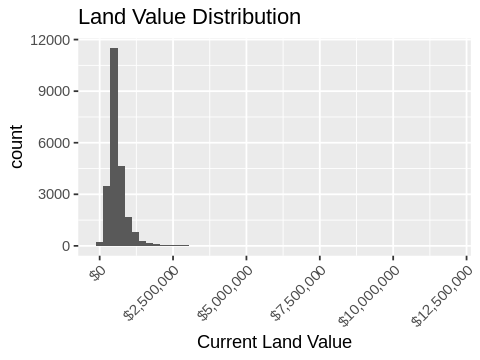

In [27]:
options(repr.plot.width = 4, repr.plot.height = 3)

# pop_dist <- ... %>% 
#     ggplot(...) + 
#     geom_...(...) +
#     ... +
#     ggtitle("Land Value Distribution") +
#     scale_x_continuous(labels = scales::dollar_format()) +
#     theme(axis.text.x = element_text(angle = 45, hjust = 1))

# your code here
 pop_dist <- multi_family_strata %>% 
     ggplot(aes(x=current_land_value)) + 
     geom_histogram(bins=50) +
     labs(x="Current Land Value") +
     ggtitle("Land Value Distribution") +
     scale_x_continuous(labels = scales::dollar_format()) +
     theme(axis.text.x = element_text(angle = 45, hjust = 1))

pop_dist

In [28]:
test_2.1()

[1] "Success!"


**Question 2.2** 
<br> {points: 1}

We are interested in the population's mean assessed value for multiple-family dwellings in strata housing. We can calculate the population parameter of interest with `summarise` because we have data for the entire population (`multi_family_strata`). (Note: in practice, we never have access to the entire population.)


_Assign your data frame to an object called `pop_mean`. The resulting data frame should have a single column named `pop_mean`._

In [30]:
# pop_mean <- ... %>% 
#     ...(pop_mean = ...(...))

# your code here
pop_mean <- multi_family_strata %>% 
     summarize(pop_mean = mean(current_land_value))

pop_mean

pop_mean
<dbl>
620331.5


In [31]:
test_2.2()

[1] "Success!"


**Question 2.3** 
<br> {points: 1}

In most cases, we rarely have the resources to record every observation in the population, so instead, we collect a single sample from the population. We use that single sample to estimate a population parameter (as well as infer how accurate our estimate is, but more on that later).

Let's pretend we are in such a situation where we can only take a sample of 40 observations, without replacement, from our population. Use `rep_sample_n` to take your sample, and set the seed to `4321`.

_Assign your data frame to an object called `sample_1`._

In [32]:
set.seed(4321) # DO NOT CHANGE!

# sample_1 <- ... %>% 
#     rep_sample_n(...)

# your code here

sample_1 <- multi_family_strata %>% 
     rep_sample_n(40)

head(sample_1)

replicate,current_land_value
<int>,<dbl>
1,775000
1,376000
1,319000
1,574000
1,707000
1,593000


In [33]:
test_2.3()

[1] "Success!"


**Question 2.4** 
<br> {points: 1}

Visualize the distribution of the random sample you just took (`sample_1`) by plotting a histogram using `geom_histogram` with the argument `bins = 50`. Add a title to the plot using `ggtitle` and ensure that the x-axis has a human-readable label.

_Assign your plot to an object called `sample_1_dist`._

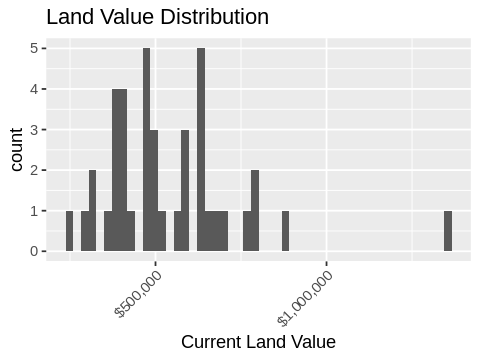

In [34]:
# your code here
sample_1_dist <- sample_1 %>% 
     ggplot(aes(x=current_land_value)) + 
     geom_histogram(bins=50) +
     labs(x="Current Land Value") +
     ggtitle("Land Value Distribution") +
     scale_x_continuous(labels = scales::dollar_format()) +
     theme(axis.text.x = element_text(angle = 45, hjust = 1))



sample_1_dist

In [35]:
test_2.4()

[1] "Success!"


**Question 2.6** 
<br> {points: 1}

Recall that our population parameter of interest is the population's mean assessed value. Using the sample you just took (`sample_1`), calculate a point estimate for the population mean using `summarise`. The resulting data frame should have a single column named `sample_1_mean`.

_Assign your data frame to an object called `sample_1_mean`._

In [36]:
# sample_1_mean <- ... %>% 
#     ...(sample_1_mean = ...(...)) %>% 
#     select(-replicate)

# your code here
sample_1_mean <- sample_1 %>% 
     summarize(sample_1_mean = mean(current_land_value)) %>% 
     select(-replicate)

sample_1_mean

`summarise()` ungrouping output (override with `.groups` argument)



sample_1_mean
<dbl>
541925


In [37]:
test_2.6()

[1] "Success!"


Now, let's compare our random sample to the population from where it was drawn.

**Note**: a small number of the members of our population and sample are not visible because we set an upper bound on the x-axis so you can see a majority of the distribution easier (this causes some of the warnings you see below).

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message:
“Removed 124 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


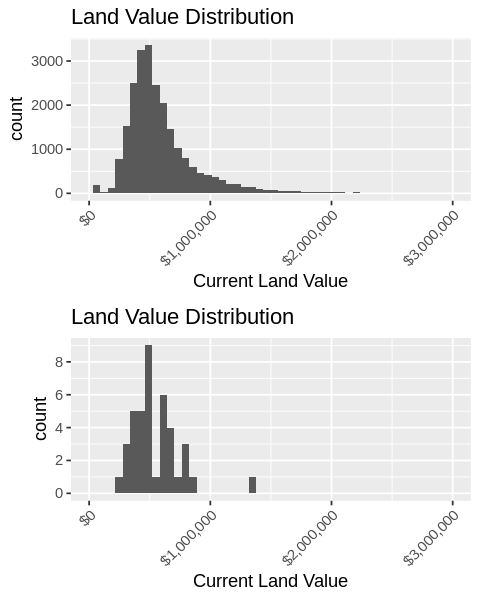

In [38]:
# Run this cell before continuing.
options(repr.plot.height = 5, repr.plot.width = 4)
plot_grid(pop_dist +
                 scale_x_continuous(limits = c(0, 3000000),
                                    labels = scales::dollar_format()),
          sample_1_dist +
                 scale_x_continuous(limits = c(0, 3000000),
                                    labels = scales::dollar_format()) +
                 scale_y_continuous(breaks = seq(0, 10, 2)),
          align = "v",
          axis = "lr",
          ncol = 1)

And now let's compare our point estimate with the true population parameter we were trying to estimate:

In [39]:
# Run this cell before continuing.
pop_mean
sample_1_mean

pop_mean
<dbl>
620331.5


sample_1_mean
<dbl>
541925


**Question 2.7**
<br> {points: 1}

After comparing the population and sample distributions above, and the true population parameter and the sample point estimate, which statement below **is not** correct:

A. The sample point estimate is close to the value of the true population parameter we are trying to estimate.

B. The sample distribution is of a similar shape to the population distribution.

C. The sample point estimate is identical to the value of the true population parameter we are trying to estimate.

_Assign your answer to an object called `answer2.7`. Your answer should be a single character surrounded by quotes._

In [42]:
# answer2.7 <- ...

# your code here
answer2.7 <- "C"

In [43]:
test_2.7()

[1] "Success!"


**Question 2.8** 
<br> {points: 1}

What if we took another sample? What would we expect? Let's try! Take another random sample from the population using the seed `9999`, visualize its distribution, and then calculate the point estimate (sample mean). To do this, copy and paste the code below and then rearrange the lines so that the code runs properly.

```{r}
summarise(sample_2_mean = mean(current_land_value))
xlab("Land Value (CAD)") +
rep_sample_n(40)
scale_x_continuous(labels = scales::dollar_format()) +
theme(axis.text.x = element_text(angle = 45, hjust = 1))
sample_2 <- multi_family_strata %>% 
ggtitle("Sample 2 distribution") +
geom_histogram(bins = 50) +
sample_2_mean <- sample_2 %>% 
sample_2_dist <- ggplot(sample_2, aes(x = current_land_value)) + 
```

_You should end up with three objects: `sample_2` (your random sample), `sample_2_dist` (your plot), and `sample_2_mean` (your point estimate)._

`summarise()` ungrouping output (override with `.groups` argument)



replicate,sample_2_mean
<int>,<dbl>
1,629475


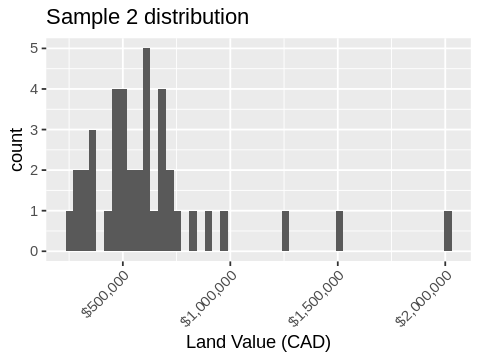

In [44]:
set.seed(9999) # DO NOT CHANGE!
options(repr.plot.width = 4, repr.plot.height = 3)

# your code here
sample_2 <- multi_family_strata %>% rep_sample_n(40)

sample_2_dist <- ggplot(sample_2, aes(x = current_land_value)) +
                xlab("Land Value (CAD)") +
                scale_x_continuous(labels = scales::dollar_format()) +
                ggtitle("Sample 2 distribution") +
                geom_histogram(bins = 50) +
                theme(axis.text.x = element_text(angle = 45, hjust = 1))

sample_2_mean <- sample_2 %>% 
        summarise(sample_2_mean = mean(current_land_value))
        






 

sample_2_dist
sample_2_mean

In [45]:
test_2.8()

[1] "Success!"


Use the distributions and point estimates printed below to answer the **next question**. Some of the code may be confusing, but you do not need to understand the code to answer the question.

**Note**: a small number of the members of our population and samples are not visible because we set an upper bound on the x-axis so you can see a majority of the distribution easier.

True population mean:  620331.5 
Sample 1 point estimate of mean:  541925 
Sample 2 point estimate of mean:  629475

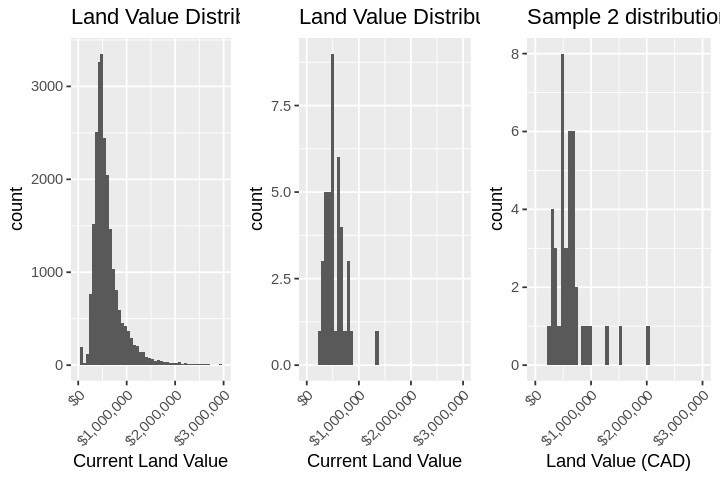

In [46]:
# Run this cell before continuing.
cat("True population mean: ", as.numeric(pop_mean$pop_mean), "\n")
cat("Sample 1 point estimate of mean: ", as.numeric(sample_1_mean$sample_1_mean), "\n")
cat("Sample 2 point estimate of mean: ", as.numeric(sample_2_mean$sample_2_mean))
options(repr.plot.height = 4, repr.plot.width = 6)
suppressWarnings(suppressMessages(plot_grid(pop_dist + scale_x_continuous(limits = c(0, 3000000),
                                                                          labels = scales::dollar_format()),
          sample_1_dist + scale_x_continuous(limits = c(0, 3000000),
                                             labels = scales::dollar_format()),
          sample_2_dist + scale_x_continuous(limits = c(0, 3000000),
                                             labels = scales::dollar_format()),
          ncol = 3)))

**Question 2.9** 
<br> {points: 1}

After comparing the distribution and point estimate of this second random sample from the population with that of the first random sample and the population, which statements below **is not** correct?

A. The sample distributions from different random samples will vary a bit depending on which values are captured in the sample.

B. The sample distributions from different random samples are of a similar shape to the population distribution.

C. The point estimates from different random samples are close to the true population parameter, but they vary a bit depending which values are captured in the sample.

D. Every random sample from the same population will have a point estimate equal to the population parameter that you are trying to estimate.

_Assign your answer to an object called `answer2.9`. Your answer should be a single character surrounded by quotes._

In [53]:
# answer2.9 <- ...

# your code here
answer2.9 <- "D"

In [54]:
test_2.9()

[1] "Success!"


## 3. Exploring the sampling distribution of an estimate

Just how much should we expect the point estimates of our random samples to vary? Let's experiment a little more with our multiple-family dwelling property population to build an intuition for this. To do this, we will take 1500 random samples of size 40 and then calculate the point estimate we are interested in (let's choose the mean for this example) for each sample. Finally, we will visualize the distribution of the sample point estimates. This distribution will tell us how much we would expect the point estimates of our random samples to vary for this population for samples of size 40 (the size of our samples).

**Question 3.0** 
<br> {points: 1}

Draw 1500 random samples from our population of multiple family dwelling strata properties (`multi_family_strata`). Each sample should have 40 observations. Use `4321` as your seed.

_Assign your data frame to an object called `samples`._

In [55]:
set.seed(4321) # DO NOT CHANGE!

# samples <- ... %>% 
#     rep_sample_n(size = ..., reps = ...)

# your code here
#fail() # No Answer - remove if you provide an answer
samples <- multi_family_strata %>% rep_sample_n(size= 40, reps= 1500)

head(samples)
tail(samples)
nrow(samples)

replicate,current_land_value
<int>,<dbl>
1,775000
1,376000
1,319000
1,574000
1,707000
1,593000


replicate,current_land_value
<int>,<dbl>
1500,460000
1500,793000
1500,598000
1500,489000
1500,672000
1500,512000


[1] 60000

In [56]:
test_3.0()

[1] "Success!"


**Question 3.1** 
<br> {points: 1}

Using the 1500 random samples you just took, group by the sample replicate number (`replicate`), and then for each sample, calculate the mean as the point estimate. The resulting data frame should have the columns `replicate` and `sample_mean`.

_Assign your data frame to an object called `sample_estimates`._

In [61]:
# your code here
sample_estimates <- samples %>% 
                group_by(replicate) %>%
                summarize(sample_mean = mean(current_land_value)) 
                #mutate(sample_mean=total)

head(sample_estimates)
tail(sample_estimates)

`summarise()` ungrouping output (override with `.groups` argument)



replicate,sample_mean
<int>,<dbl>
1,541925
2,565875
3,579385
4,795950
5,639250
6,593075


replicate,sample_mean
<int>,<dbl>
1495,570697.5
1496,662500.0
1497,595192.5
1498,610960.0
1499,590400.0
1500,625075.0


In [62]:
test_3.1()

[1] "Success!"


**Question 3.2** 
<br> {points: 1}

Visualize the distribution of the sample estimates (`sample_estimates`) you just calculated by plotting a histogram using `geom_histogram` with the argument `bins = 30`. Add a title to the plot using `ggtitle` and ensure that the x-axis has a human-readable label.

_Assign your plot to an object called `sampling_distribution`._

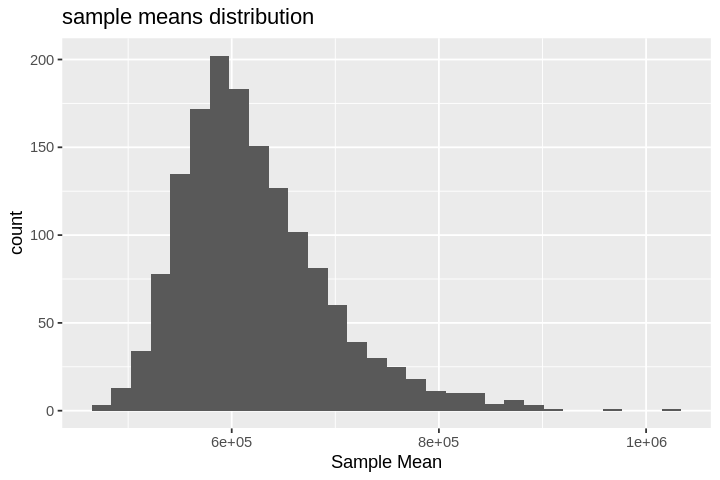

In [74]:
# your code here
sampling_distribution <- ggplot(sample_estimates, aes(x = sample_mean)) +
  geom_histogram(bins=30) +
  labs(x = "Sample Mean")+
  ggtitle("sample means distribution") 


sampling_distribution

In [75]:
test_3.2()

[1] "Success!"


**Question 3.3** 
<br> {points: 1}

Let's refresh our memory; what is the mean current land value of the population (we calculated this above)?

_Assign your answer to an object called `answer3.3`. Your answer should be a single number._

In [76]:
# answer3.3 <- ...

# your code here
answer3.3 <- 620331.5
answer3.3

[1] 620331.5

In [77]:
test_3.3()

[1] "Success!"


**Question 3.4**
<br> {points: 1}

Considering the true value for the population mean, and the sampling distribution you created and visualized in Question 3.2, which statement below **is not** correct:

A. The sampling distribution is centered at the true population mean.

B. Most sample means are at or very near the same value as the true population mean.

C. All the sample means are the same value as the true population mean.

D. The sampling distribution is more concentrated around the population mean than most sample distributions would be.

*Assign your answer to an object called `answer3.4`. Your answer should be a single character surrounded by quotes.*

In [78]:
# answer3.4 <- ...

# your code here
answer3.4 <- "C"

In [79]:
test_3.4()

[1] "Success!"


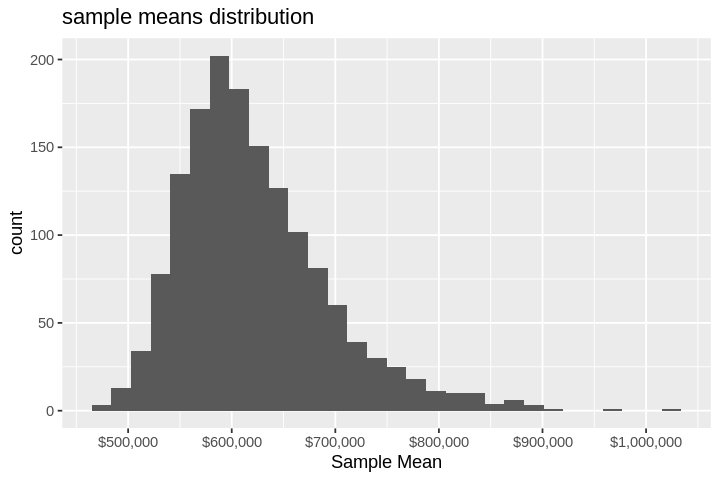

In [80]:
# Run this cell before continuing.
sampling_distribution + scale_x_continuous(breaks = seq(500000, 1000000, 100000),
                                           labels = scales::dollar_format())

**Question 3.5**
<br> {points: 1}

Considering the sampling distribution you visualized in Question 3.2 (and showed again above), within which of the following range of values (in CAD) do **most** of the sample means lie? We have printed the sampling distribution again directly above this question for your convenience.

A. \\$700,000 to \\$1,000,000

B. \\$650,000 to \\$800,000

C. \\$550,000 to \\$700,000

D. \\$500,000 to \\$600,000

_Assign your answer to an object called `answer3.5`. Your answer should be a single character surrounded by quotes._

In [81]:
# answer3.5 <- ...

# your code here
answer3.5 <- "C"

In [82]:
test_3.5()

[1] "Success!"


**Question 3.6**
<br> {points: 1}

True or false?

Taking a random sample and calculating a point estimate is a "good guess" of the unknown population parameter you are interested in. 

_Assign your answer to an object called `answer3.6`. Your answer should be either "true" or "false", surrounded by quotes._

In [85]:
# answer3.6 <- ...

# your code here
answer3.6 <- "true"

In [86]:
test_3.6()

[1] "Success!"


**Question 3.7**
<br> {points: 1}

Suppose you work for a radio station in Vancouver, and the owner (your boss) is interested in selecting music based on the age of the audience. You are asked to gather a random sample of the audience and report an estimation of the mean age of the entire audience to your boss. Considering what you know about sampling distributions, which of the following **is true** regarding the estimation of the population parameter of interest (mean) using a single point estimate?

A. A single point estimate might be inaccurate, depending on who ends up in the random sample. Perhaps you should hold off on this project until you learn more about the error associated with a point estimate and how you could report it to your boss.

B. A single point estimate might be inaccurate, depending on who ends up in the random sample. However, you should ignore this and not report anything about this to your boss since there is much higher chance that the point estimate will be close to the true population parameter.

C. A single point estimate from a random sample is guaranteed to be accurate. You can report the point estimate to your boss with complete confidence.

_Assign your answer to an object called `answer3.7`. Your answer should be a single character surrounded by quotes._

In [97]:
# answer3.7 <- ...

# your code here
answer3.7 <- "A"

In [98]:
test_3.7()

[1] "Success!"


### Final thoughts

Congratulations! You have completed your first STAT 201 worksheet. Before you close the tab, here are a few final remarks:
- **First, don't forget to save your work with `File` -> `Save & Checkpoint`. You should always do this periodically _(TIP: use the keybind `Ctrl+S` or `Cmd+S` to speed up the process)._**
- Recall that we were interested in estimating the mean assessment value (`current_land_value`) for multiple family dwellings in strata housing (`multi_family_strata`).
- Here, we had access to data to the entire population, which would defeat the purpose of "estimating" in reality. Usually, this is not the case. However, we went ahead and made many estimates anyways to learn about how they behave.
- By doing this, we now understand that point estimates can vary. This knowledge will be useful when we don't have access to the entire population, and later on, we will learn how to quantify this inherent "uncertainty" in our point estimates and infer about how accurate they are.